In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crime_data = pd.read_csv('Data/Ireland_Crime_Data.csv')

crime_data.head(10)


,STATISTIC Label,Year,Type of Offence,UNIT,VALUE
0,Recorded crime incidents,2003,Homicide offences,Number,100.0
1,Recorded crime incidents,2003,Murder,Number,35.0
2,Recorded crime incidents,2003,Manslaughter,Number,16.0
3,Recorded crime incidents,2003,Infanticide,Number,0.0
4,Recorded crime incidents,2003,Dangerous driving leading to death,Number,49.0
5,Recorded crime incidents,2003,Sexual offences,Number,1572.0
6,Recorded crime incidents,2003,Rape of a male or female,Number,325.0
7,Recorded crime incidents,2003,Defilement of a boy or girl less than 17 years...,Number,112.0
8,Recorded crime incidents,2003,Sexual offence involving mentally impaired person,Number,23.0
9,Recorded crime incidents,2003,Aggravated sexual assault,Number,11.0


In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  1575 non-null   object 
 1   Year             1575 non-null   int64  
 2   Type of Offence  1575 non-null   object 
 3   UNIT             1575 non-null   object 
 4   VALUE            1574 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 61.7+ KB


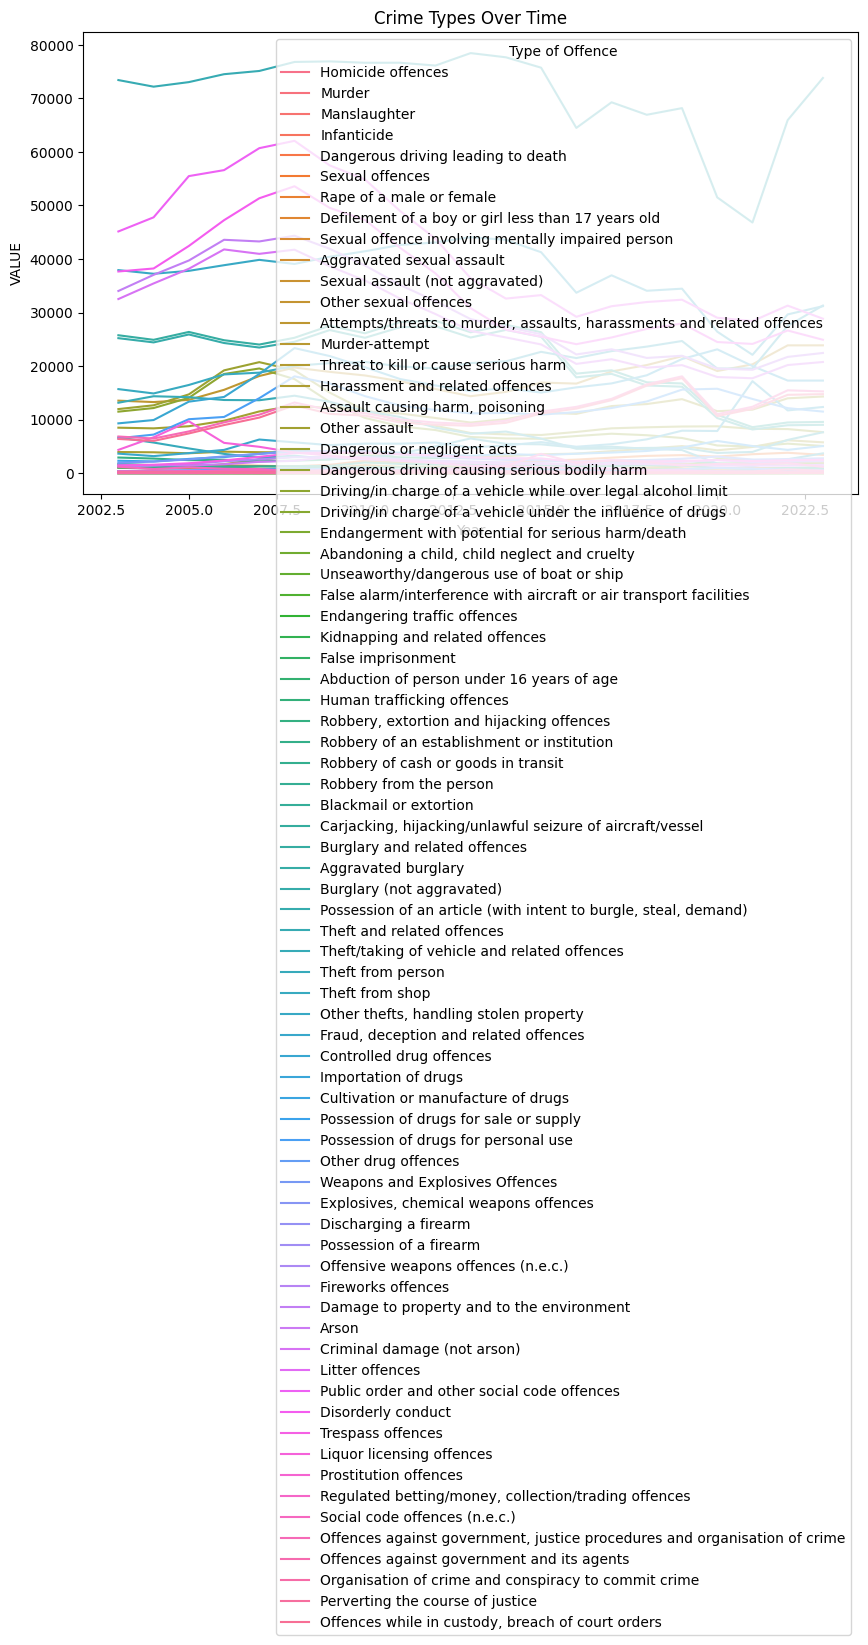

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=crime_data, x='Year', y='VALUE', hue='Type of Offence')
plt.title('Crime Types Over Time')
plt.show()
